# Covid Periodicity Analusys Using Discreet Fourier Transform

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from scipy.fft import fft, fftfreq
import seaborn as sns

sns.set_theme("notebook")
sns.set_style("whitegrid")
params = {'legend.fontsize': 'small','figure.figsize': (10, 5),'axes.labelsize': 'small','xtick.labelsize':'small','ytick.labelsize':'small'}
plt.rcParams.update(params)

C:\Users\lucac\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lucac\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\lucac\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\lucac\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [5]:
 !curl https://covid.ourworldindata.org/data/owid-covid-data.csv -o ./owid-covid-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10.6M    0 10.6M    0     0  19.7M      0 --:--:-- --:--:-- --:--:-- 19.7M
100 44.1M    0 44.1M    0     0  39.1M      0 --:--:--  0:00:01 --:--:-- 39.1M


In [4]:
nations = sorted([
    "Argentina",
    "Australia",
    "Brazil",
    "Canada",
    "France",
    "Germany",
    "Japan",
    "India",
    "Indonesia",
    "Italy",
    "Mexico",
    "Russia",
    "South Africa",
    "Saudi Arabia",
    "South Korea",
    "Turkey",
    "United Kingdom",
    "United States",
    "Spain",
    "Sweden",
    "Croatia",
    "Hungary",
    "Belgium",
    "Portugal",
    "Norway",
    "Colombia",
    "Chile",
    "Denmark",
    "Austria",
    "Morocco"
])

data = pd.read_csv("./owid-covid-data.csv")
data['new_cases'] = data['new_cases'].fillna(0)
data['new_deaths'] = data['new_deaths'].fillna(0)
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152690,ZWE,Africa,Zimbabwe,2022-01-02,214214.0,0.0,1409.000,5017.0,0.0,18.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
152691,ZWE,Africa,Zimbabwe,2022-01-03,216087.0,1873.0,1519.714,5047.0,30.0,19.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
152692,ZWE,Africa,Zimbabwe,2022-01-04,217678.0,1591.0,1447.143,5078.0,31.0,19.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
152693,ZWE,Africa,Zimbabwe,2022-01-05,219057.0,1379.0,1644.143,5092.0,14.0,21.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


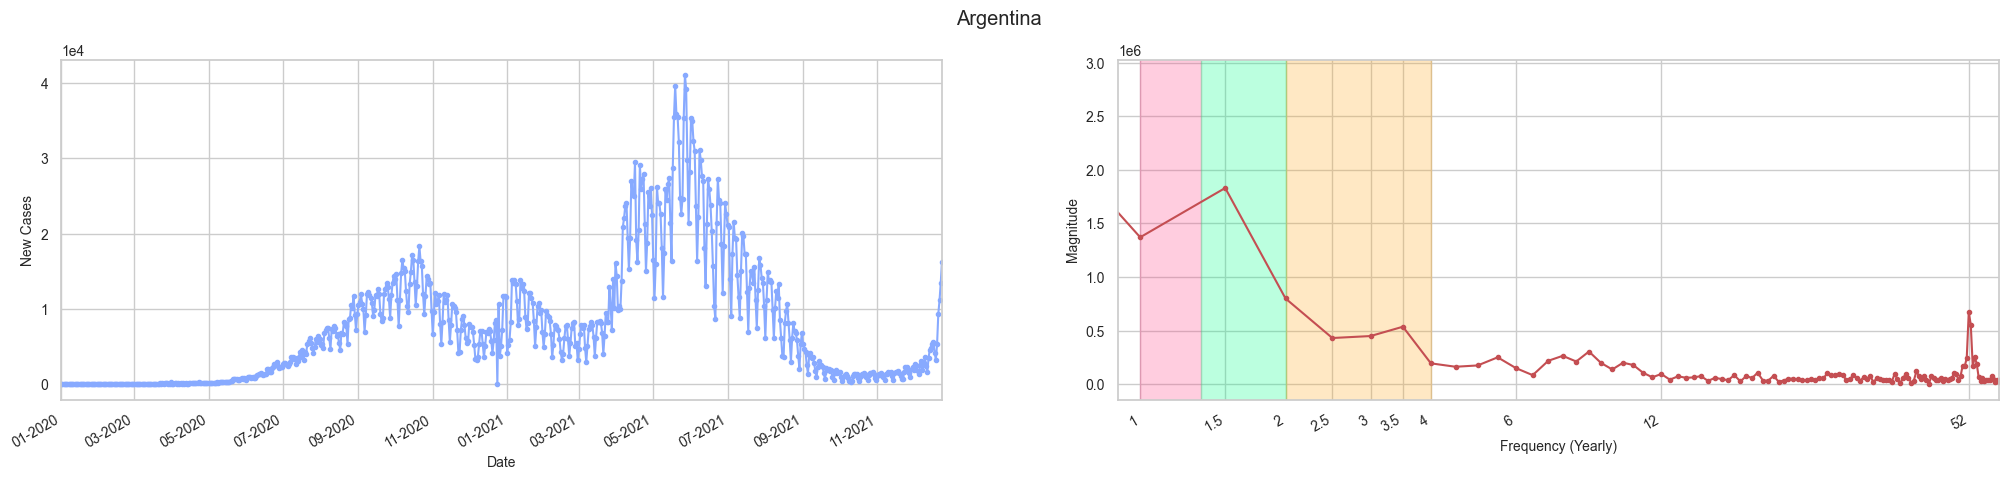

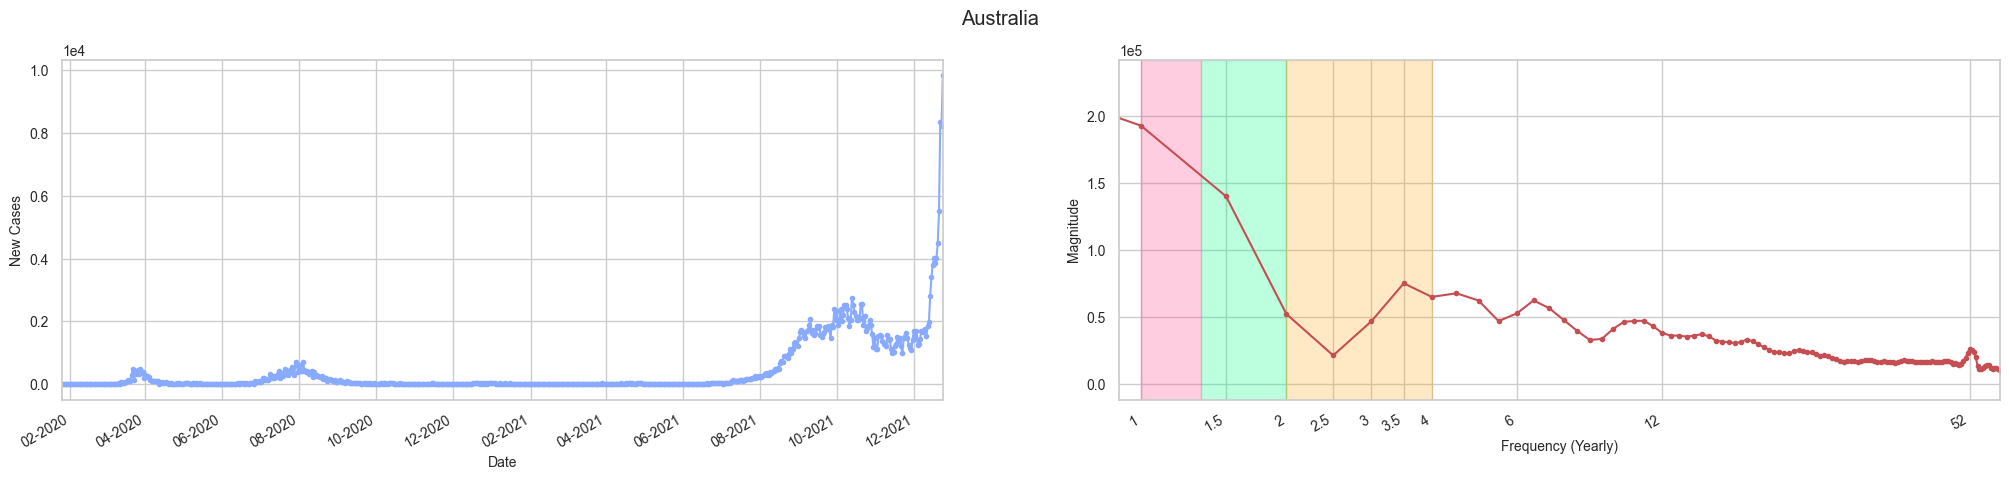

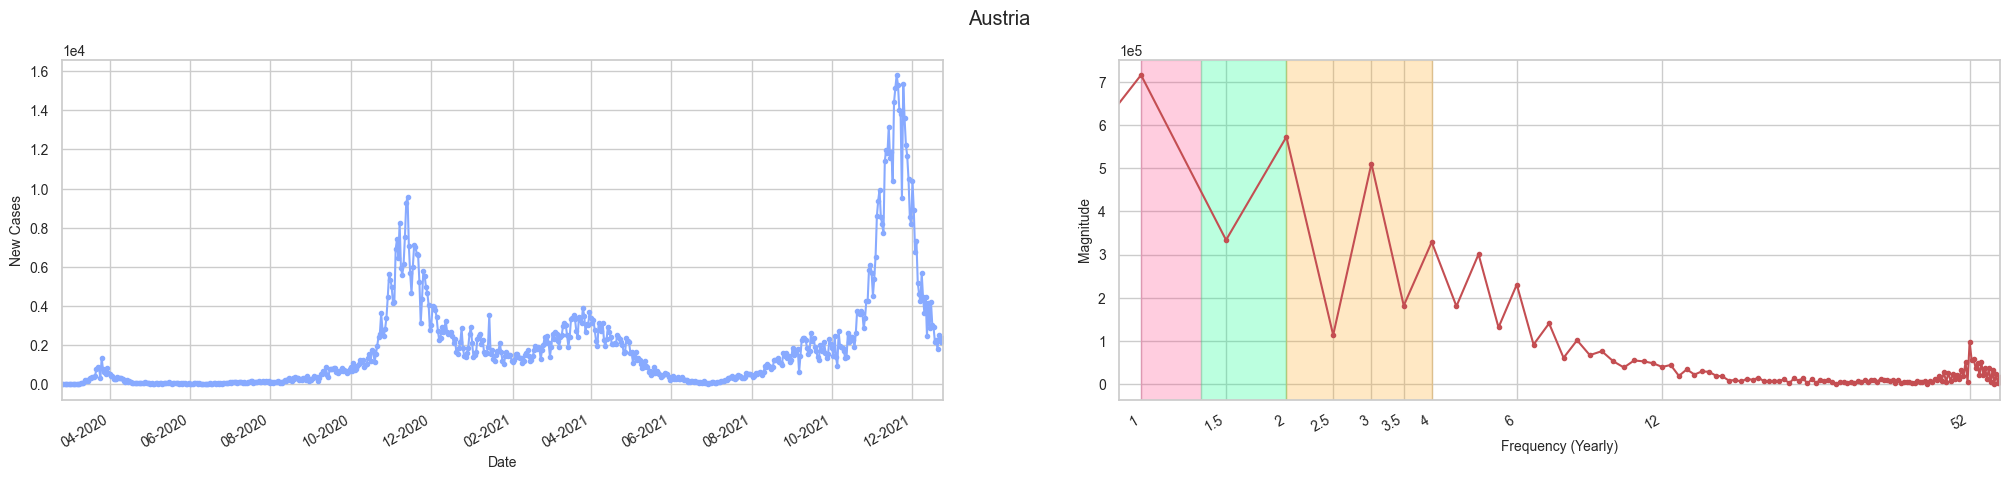

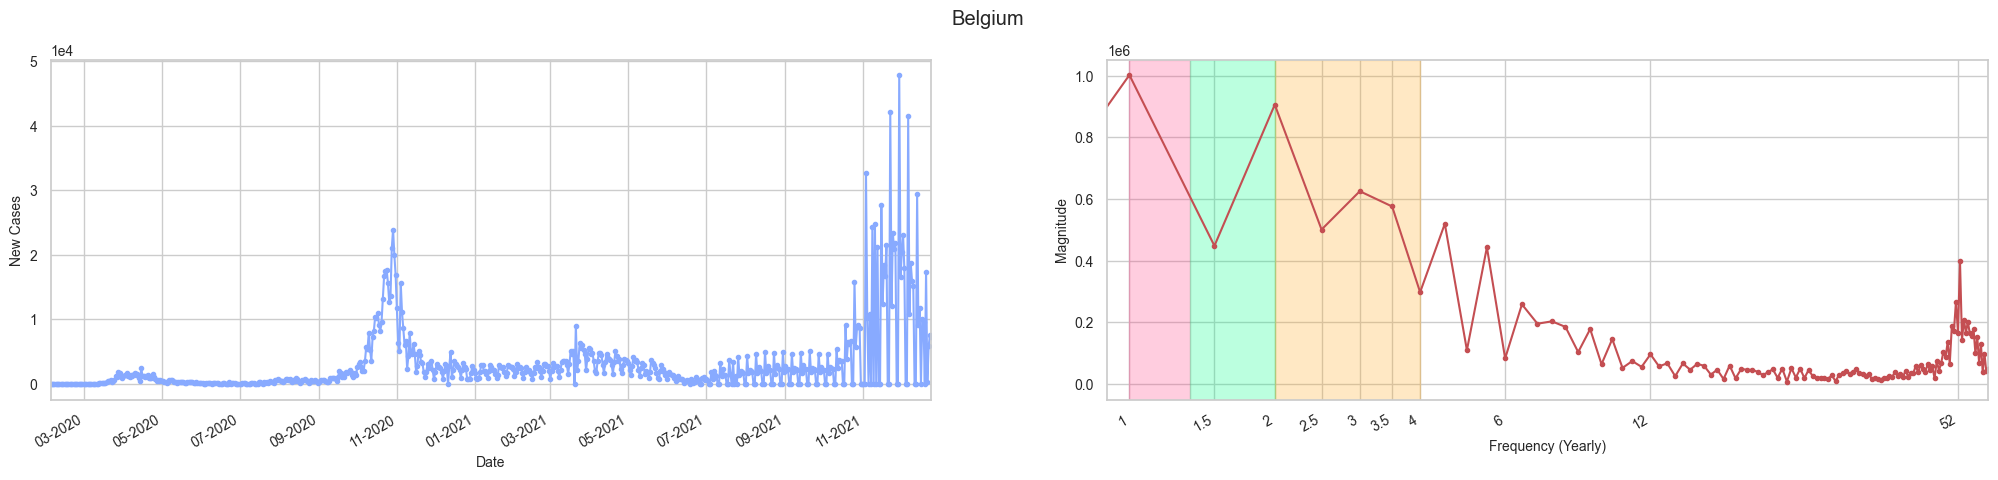

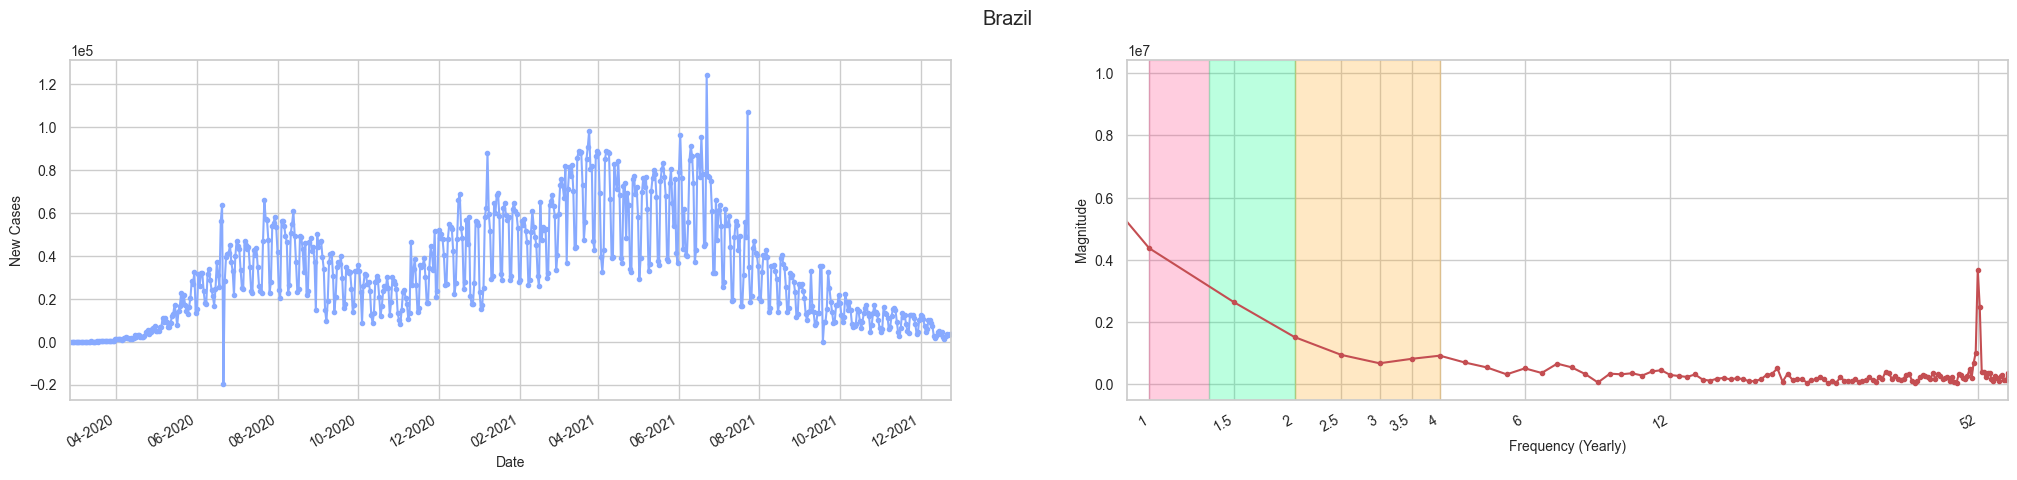

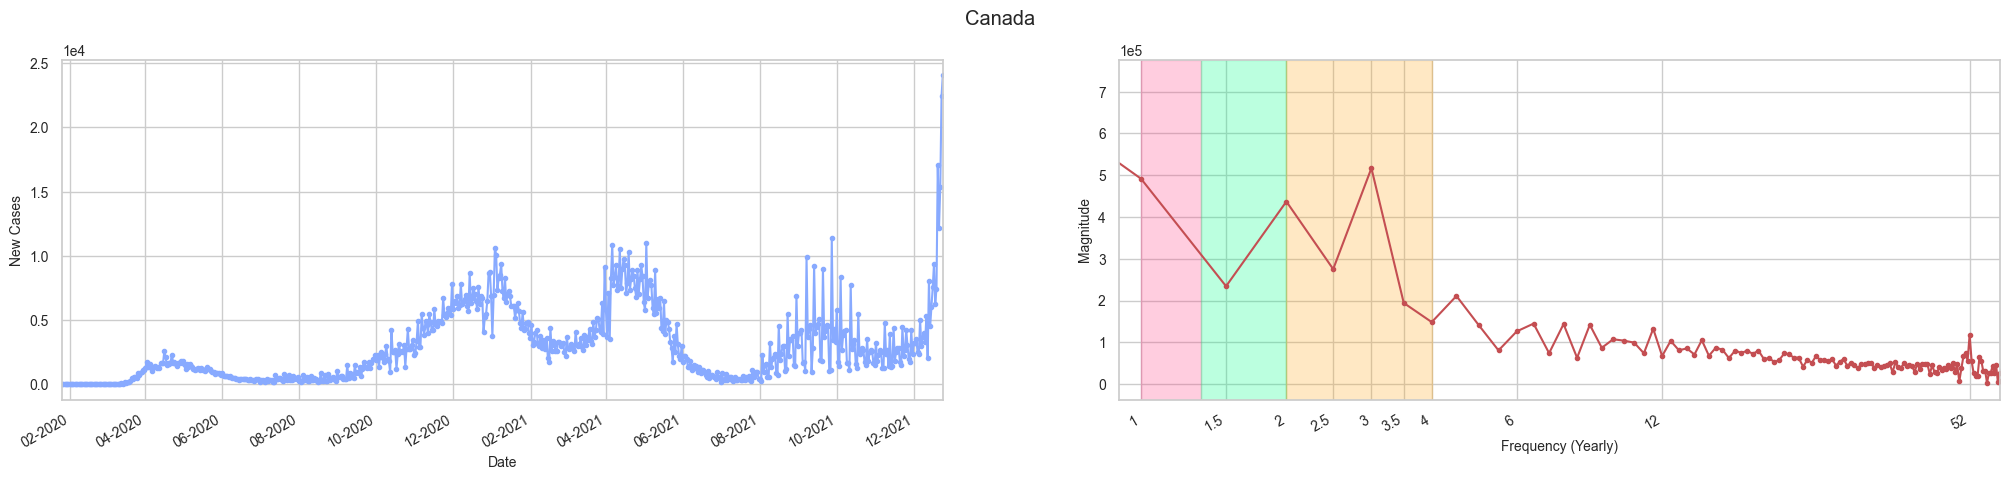

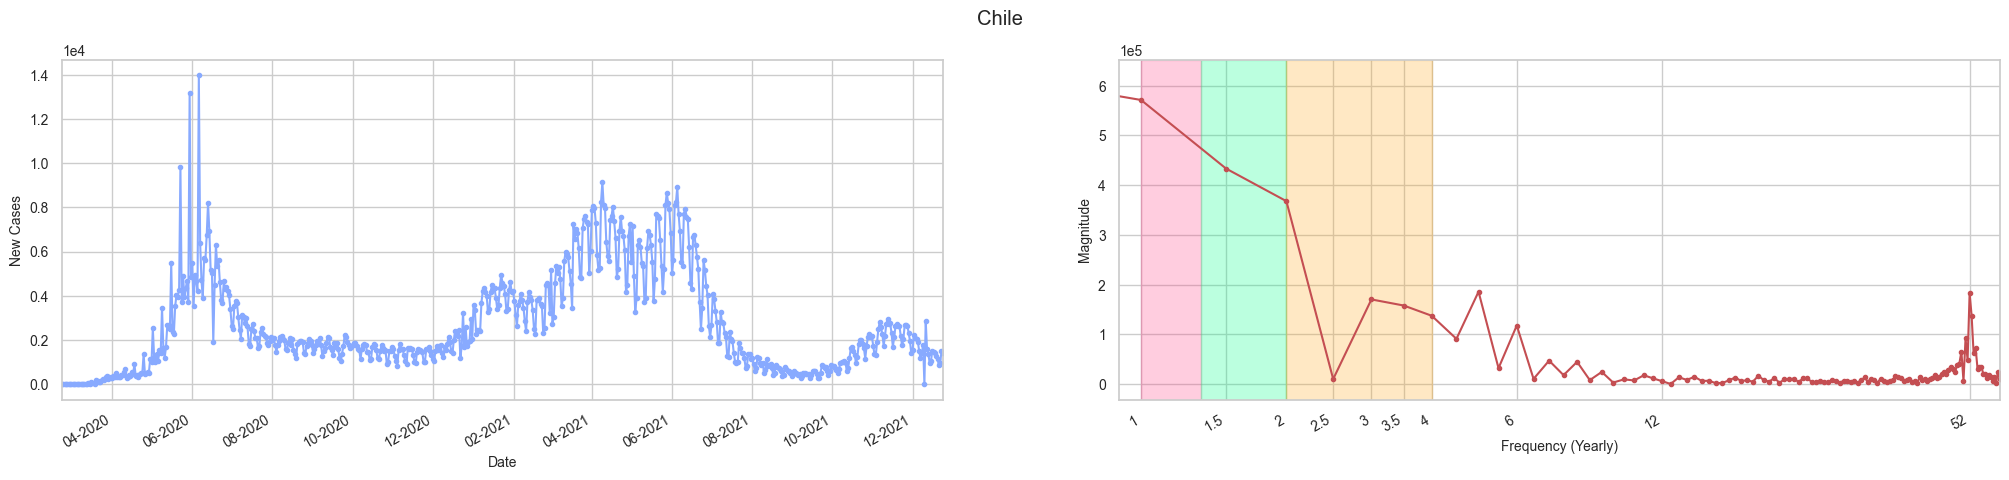

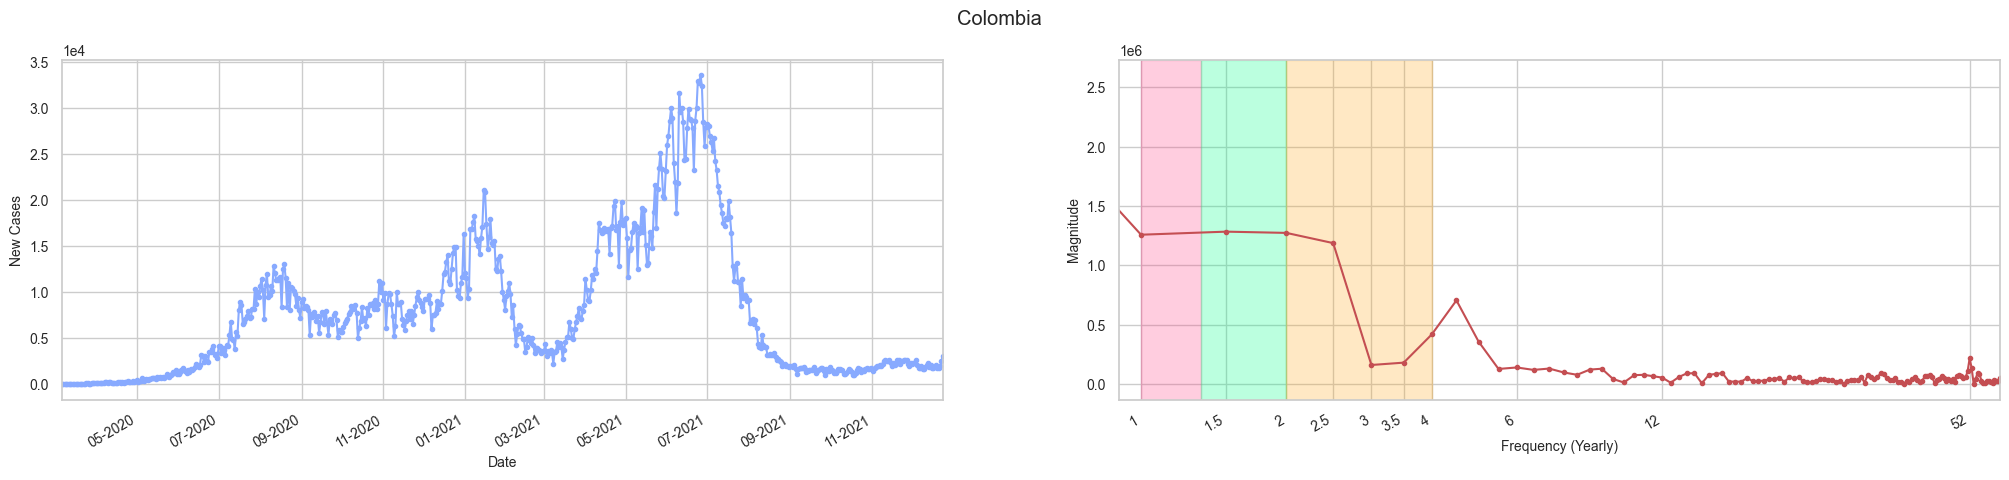

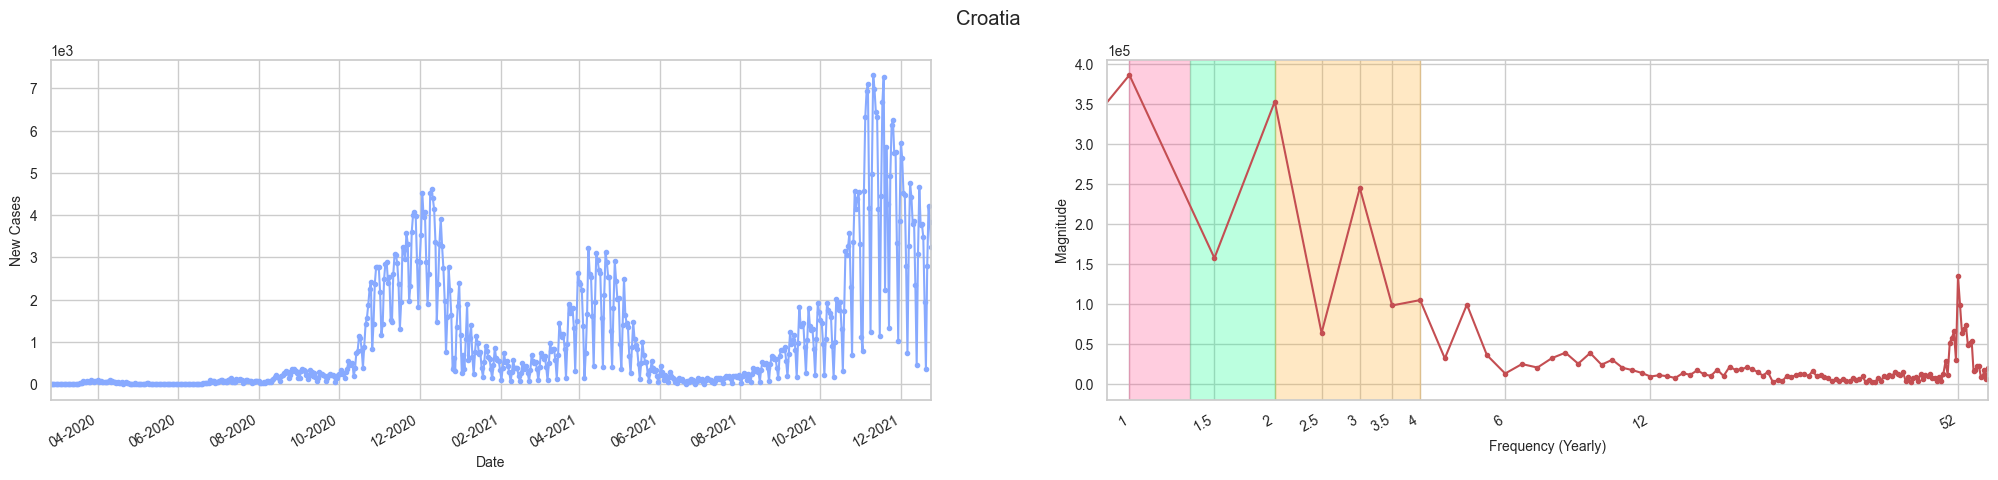

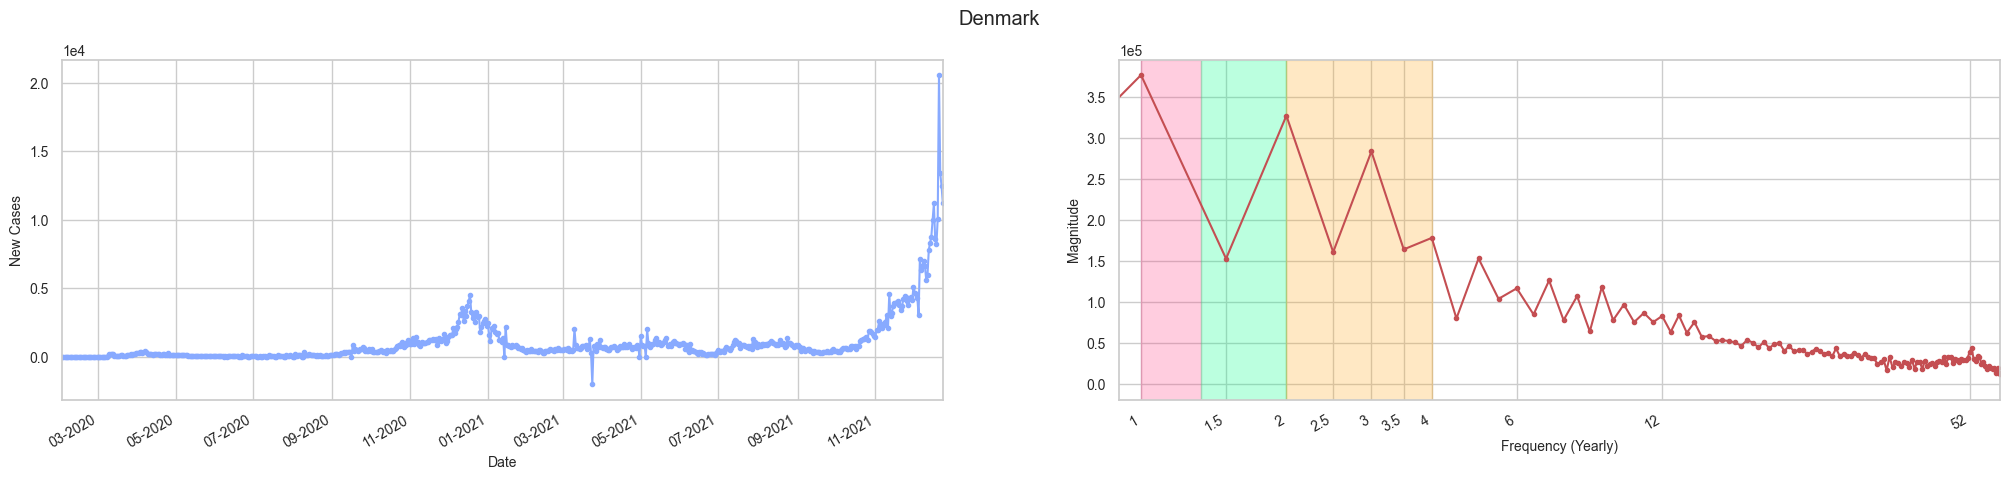

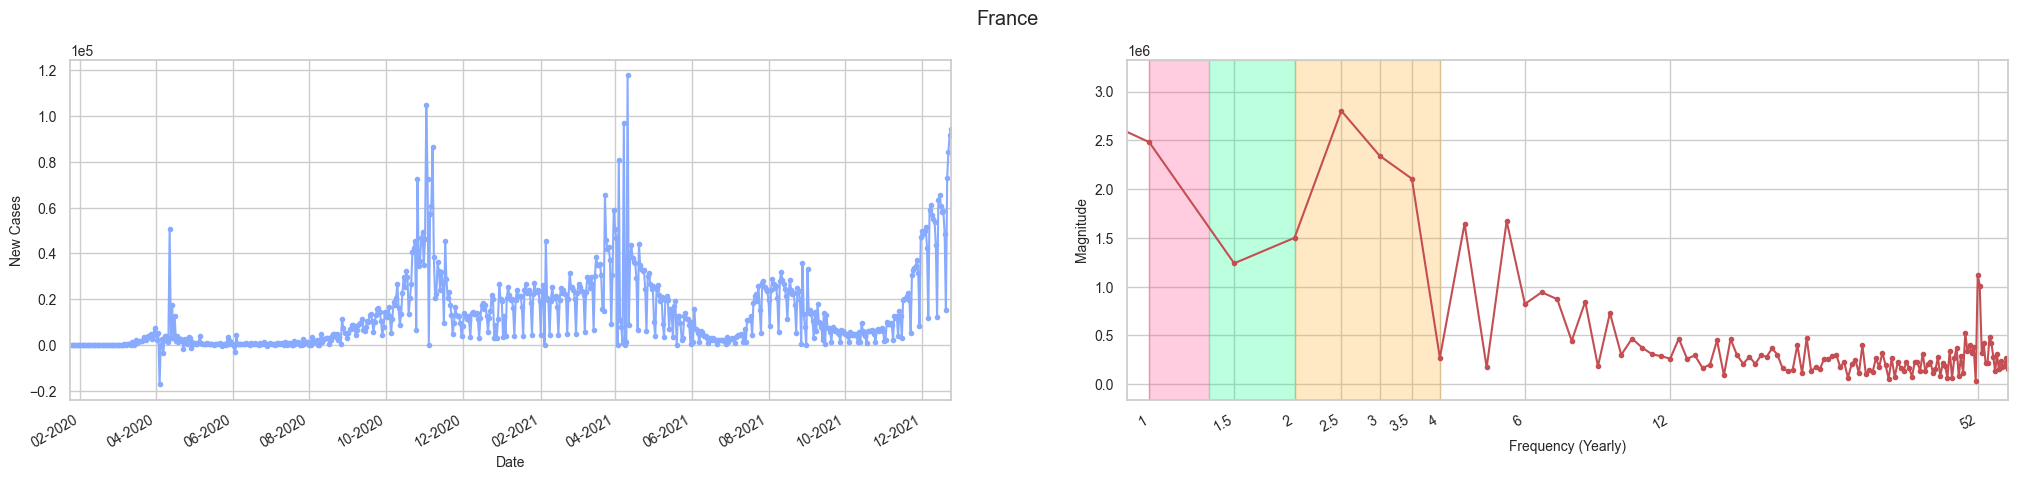

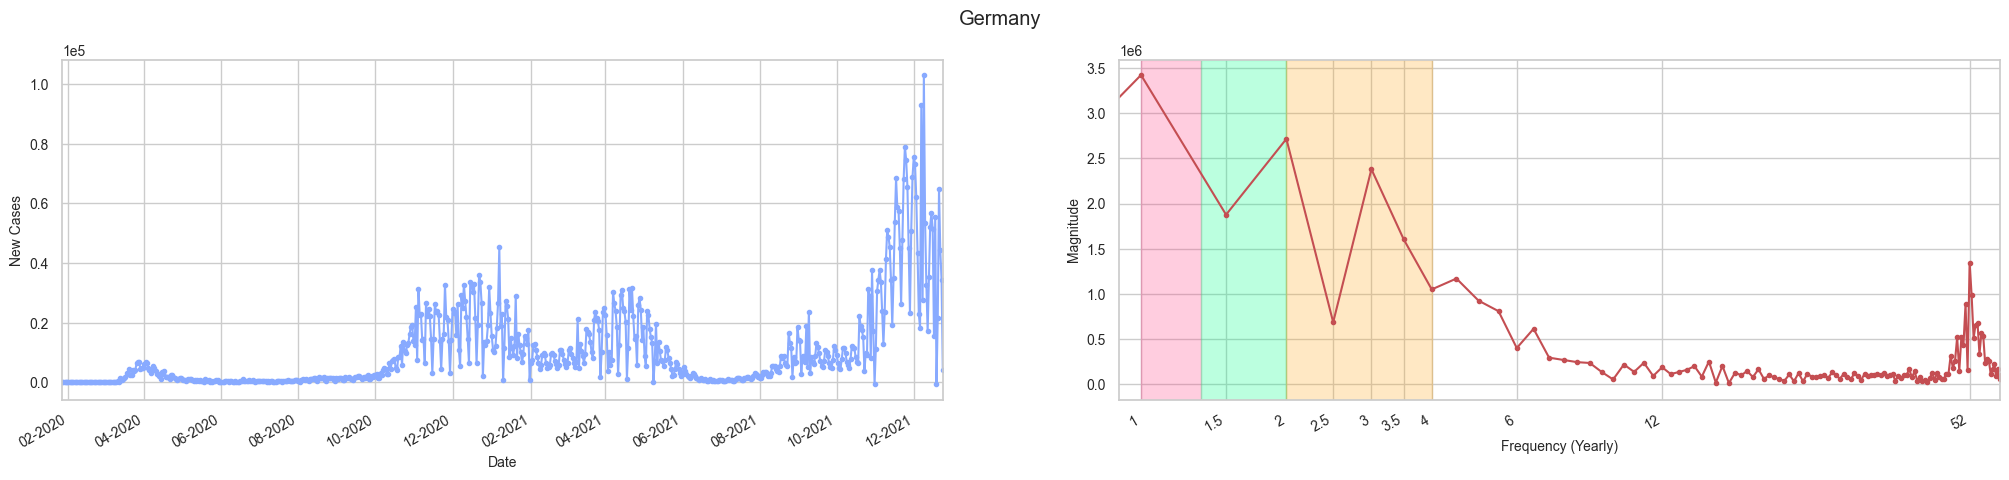

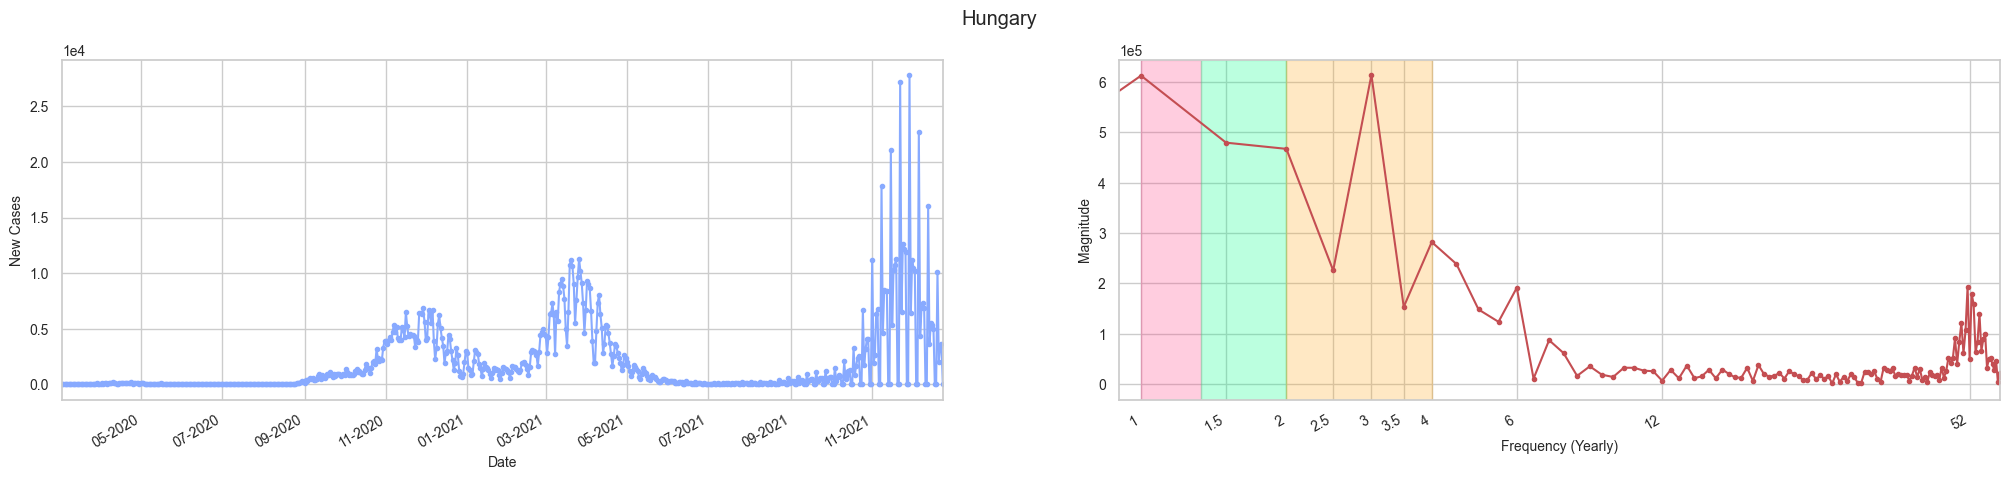

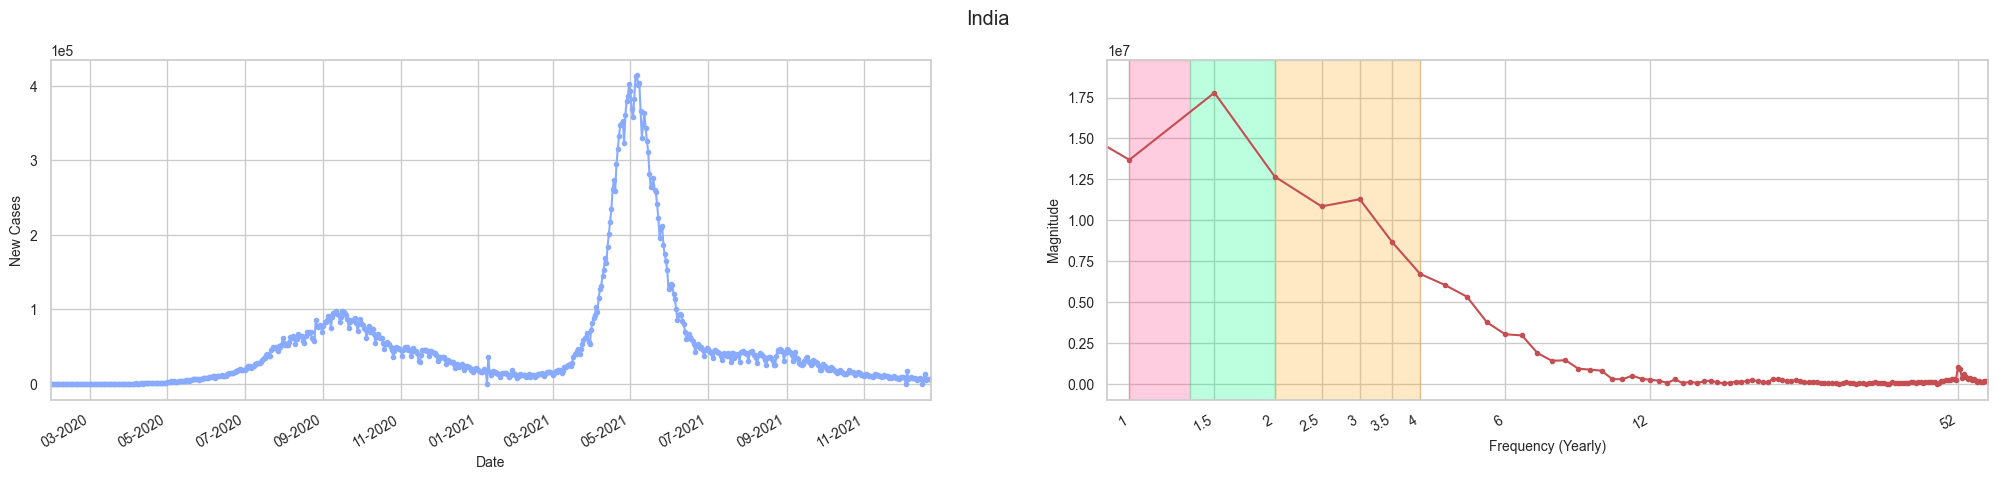

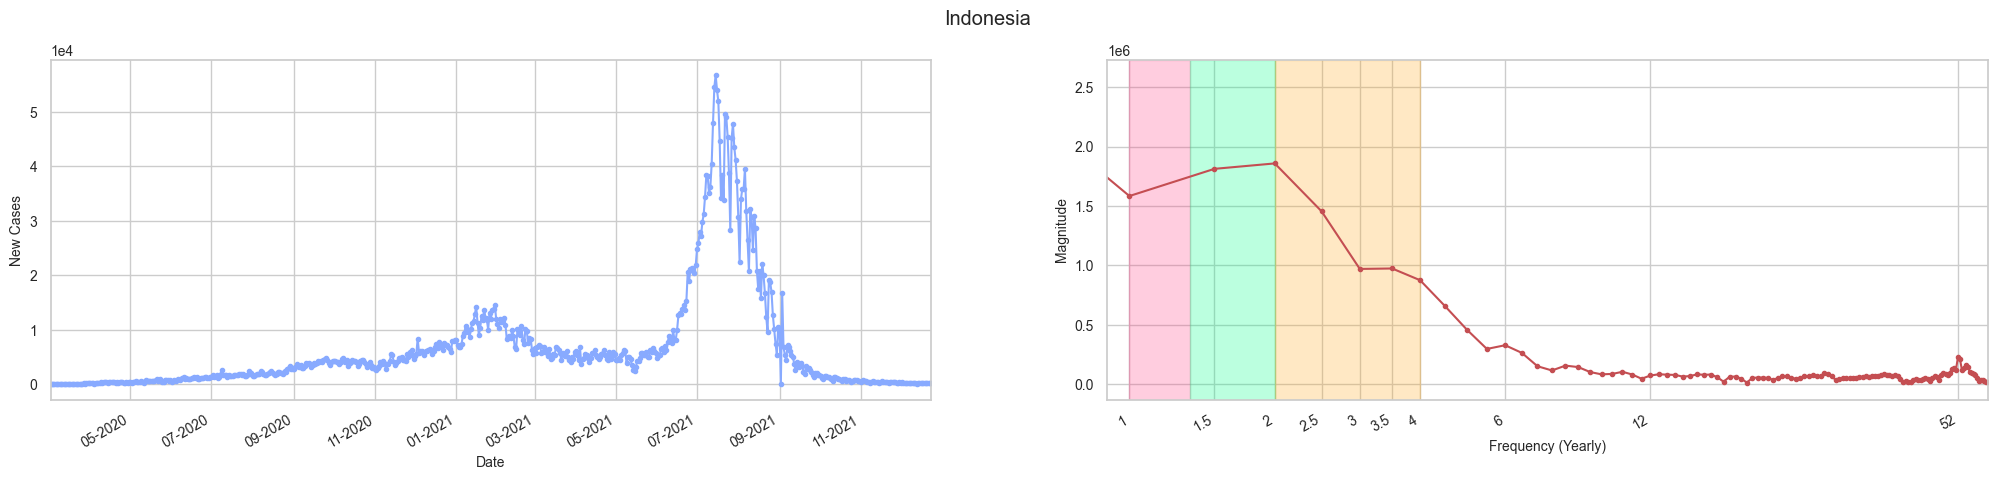

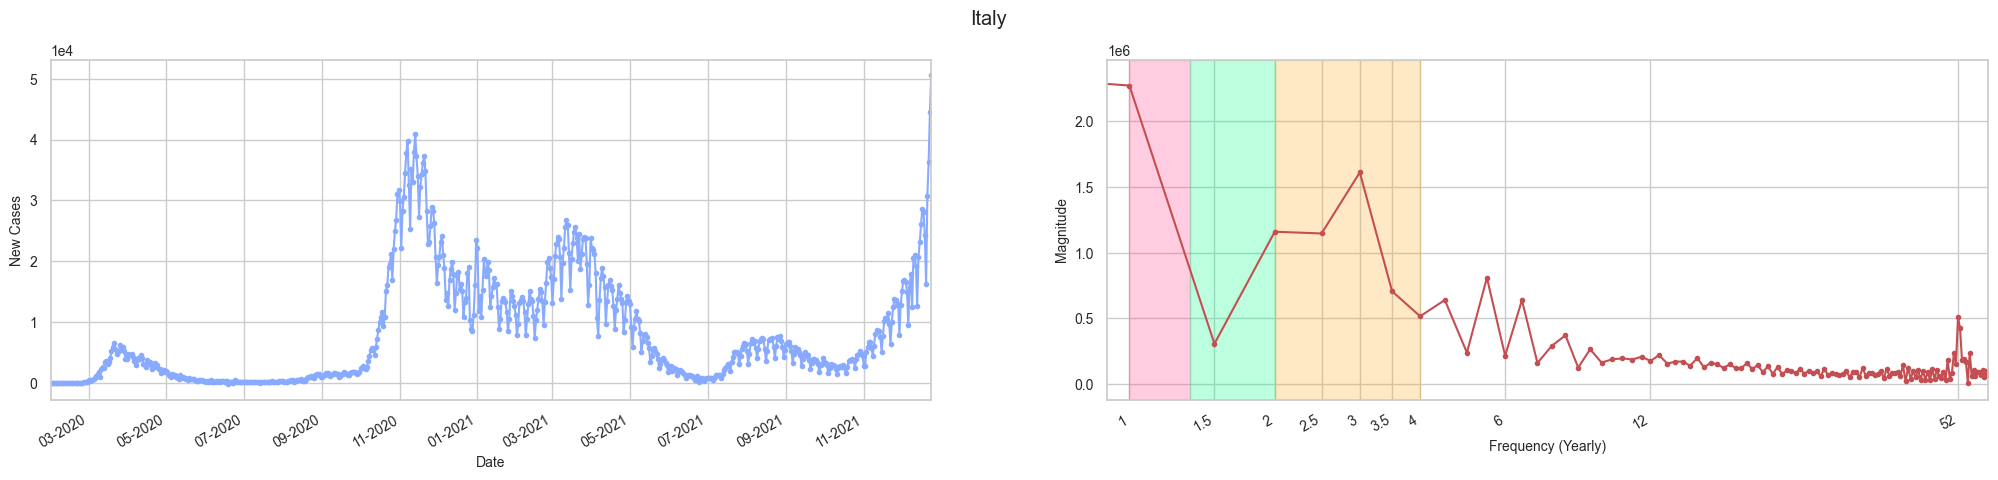

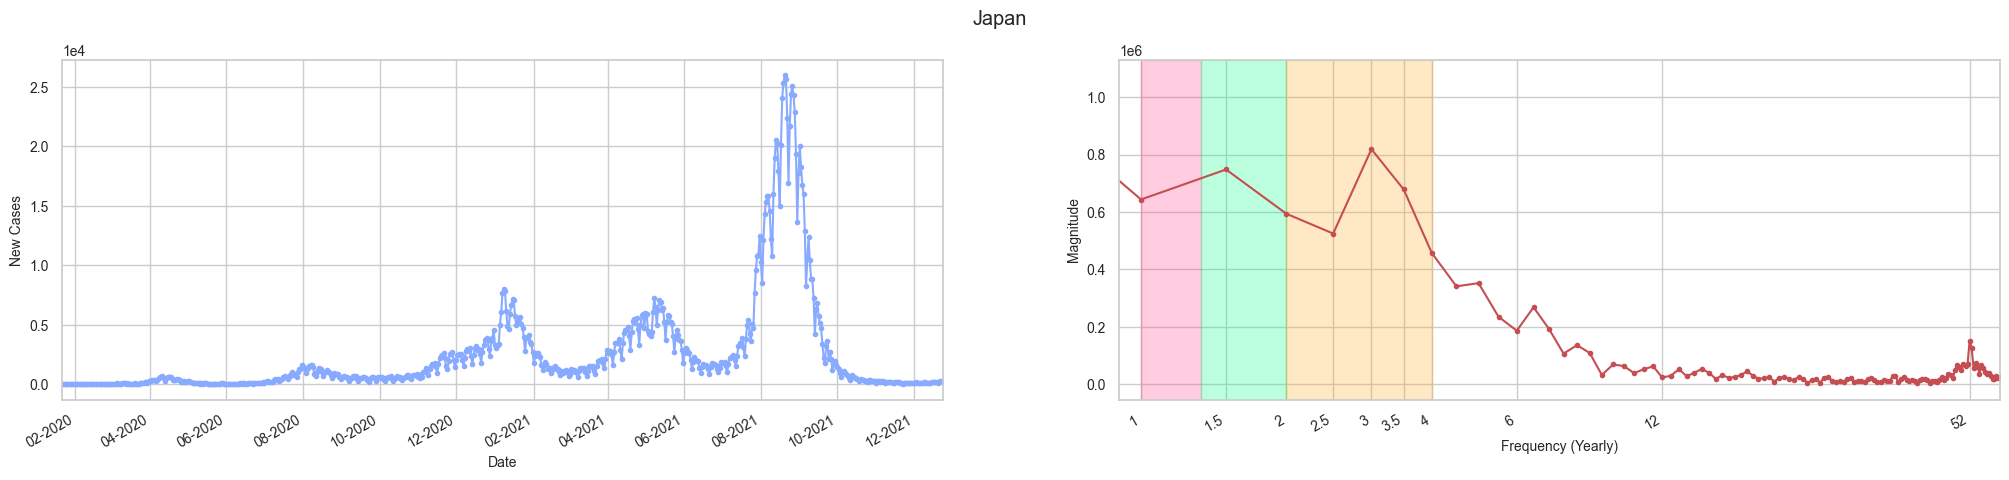

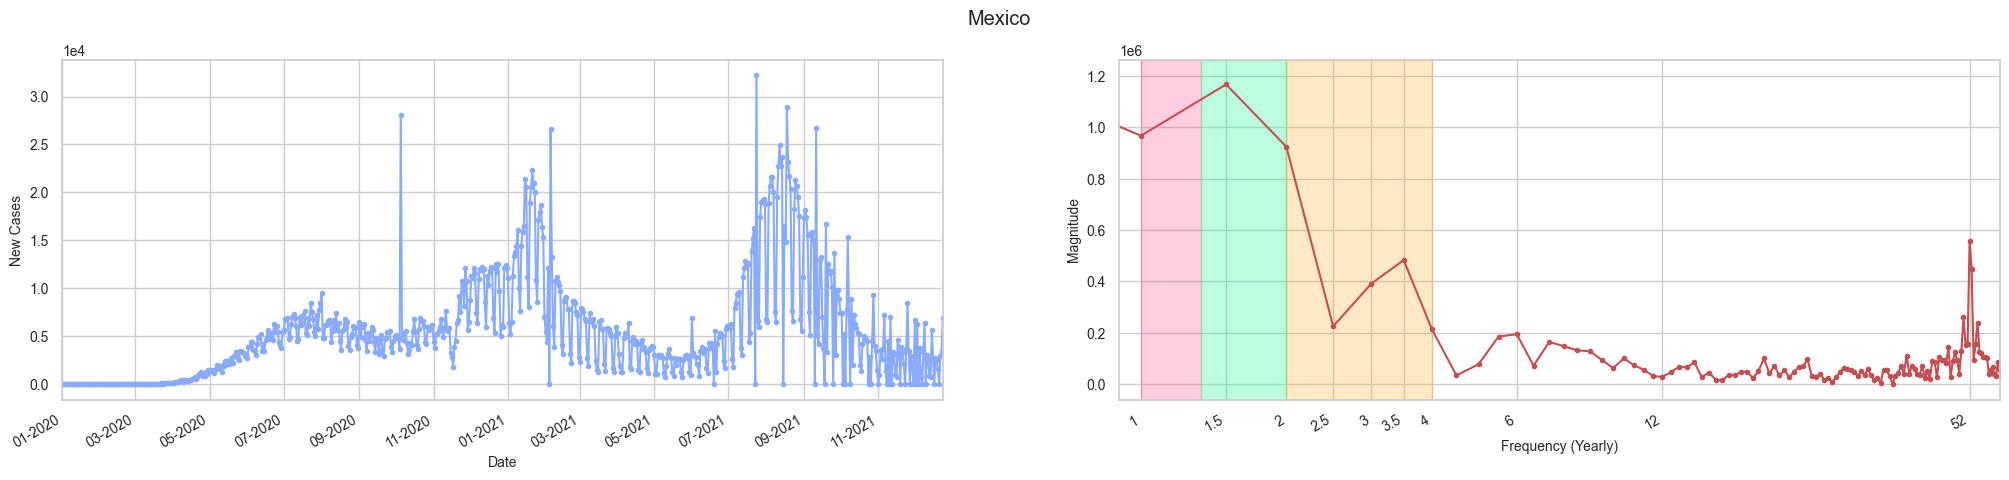

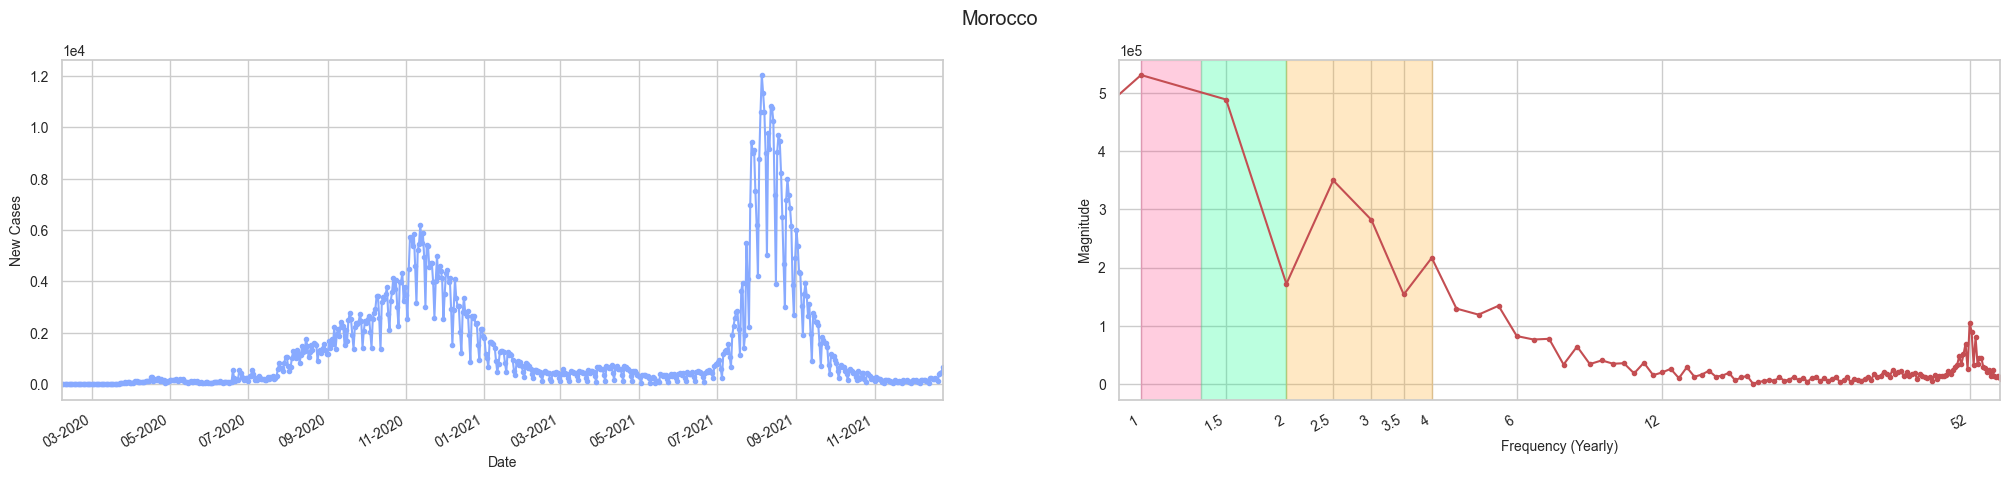

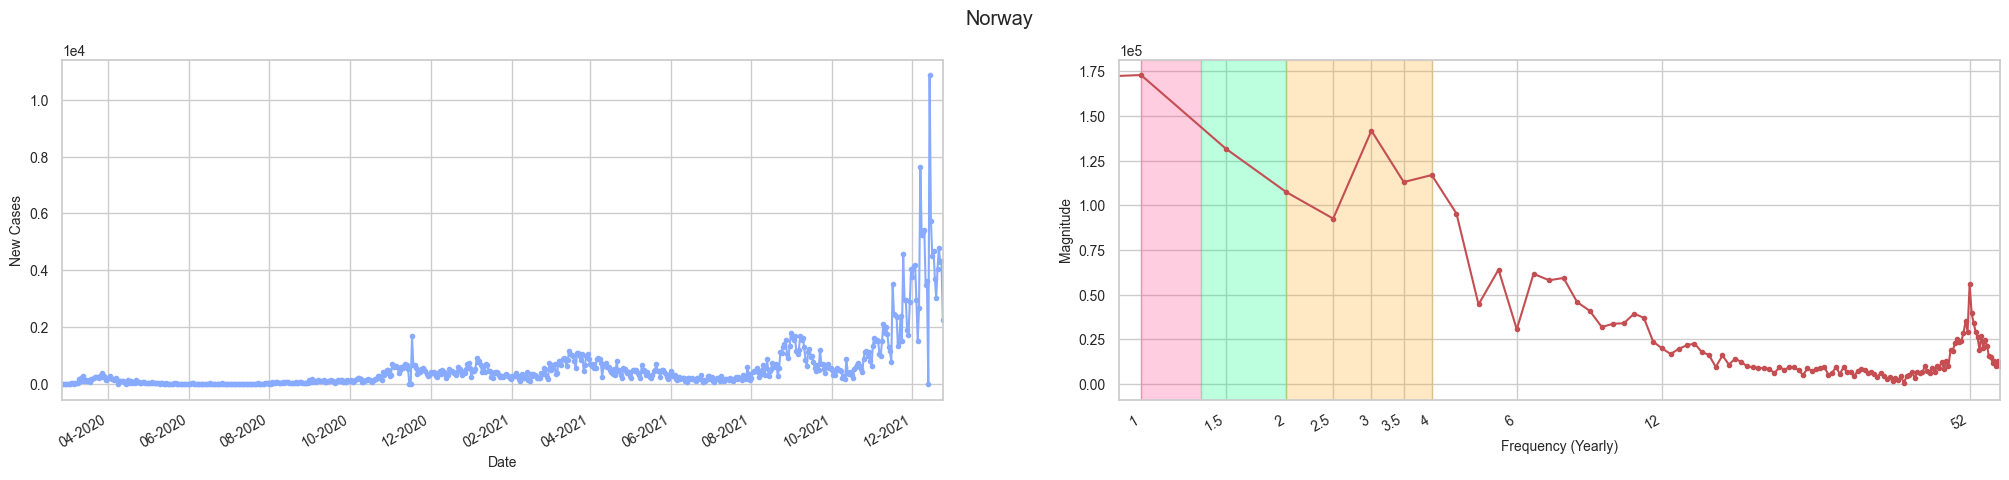

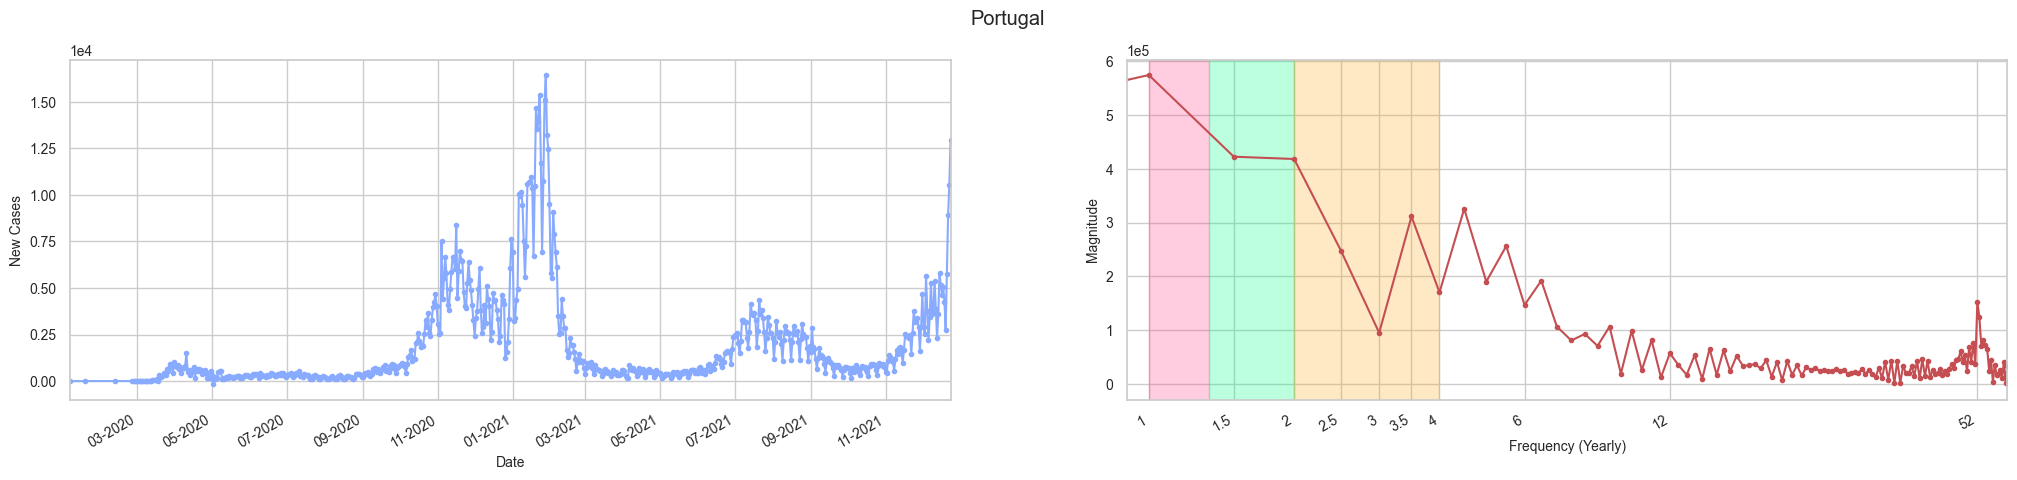

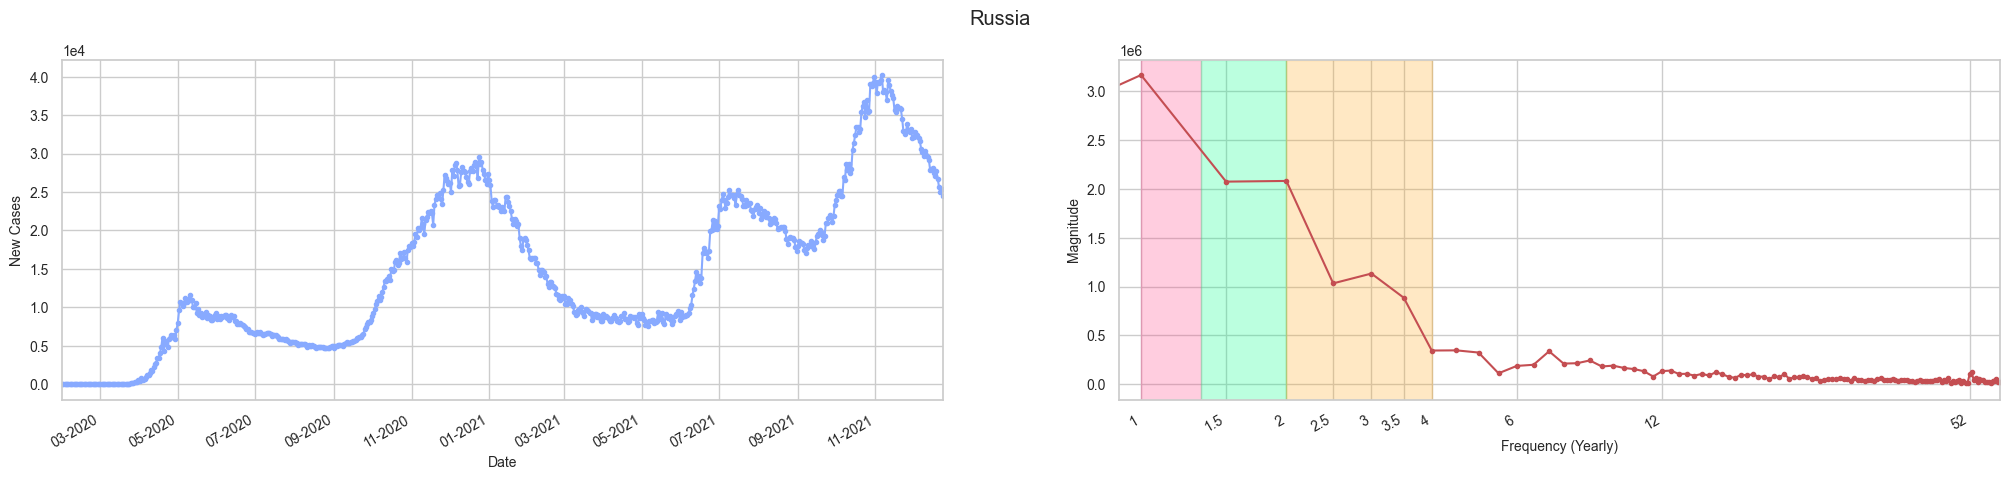

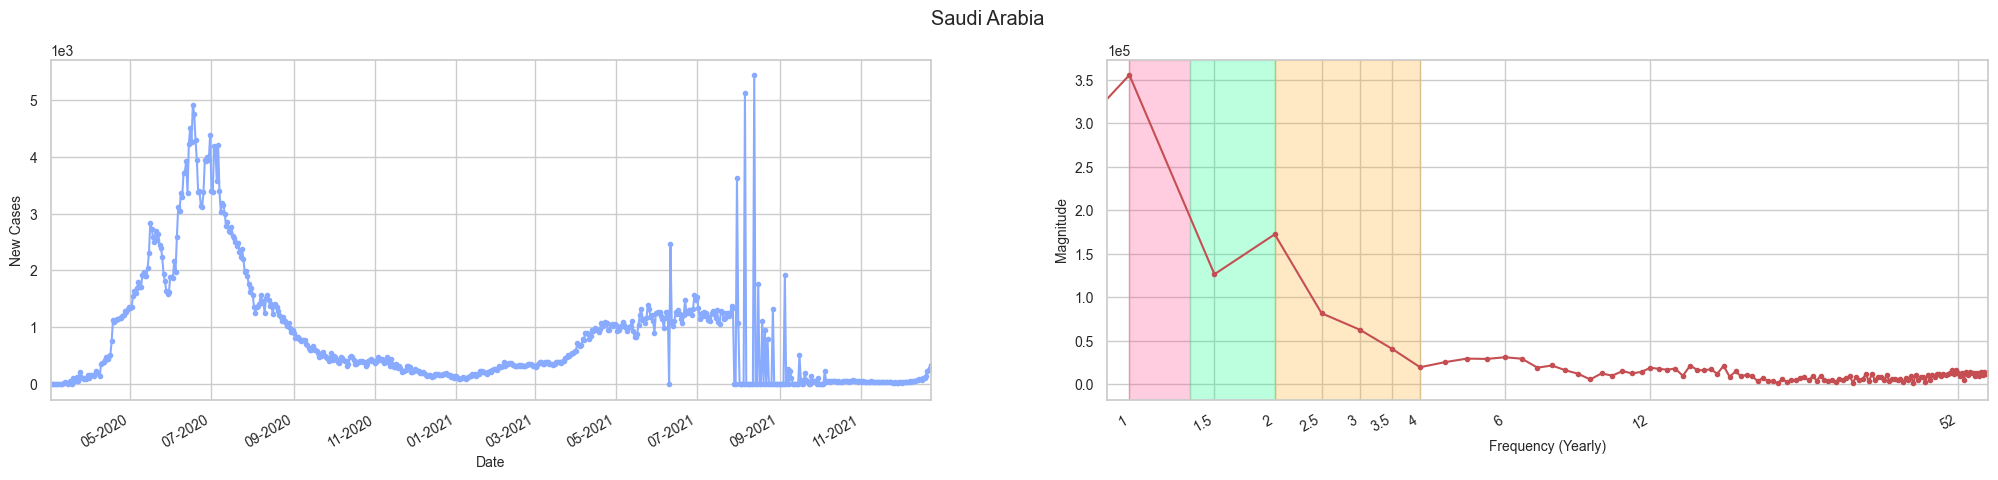

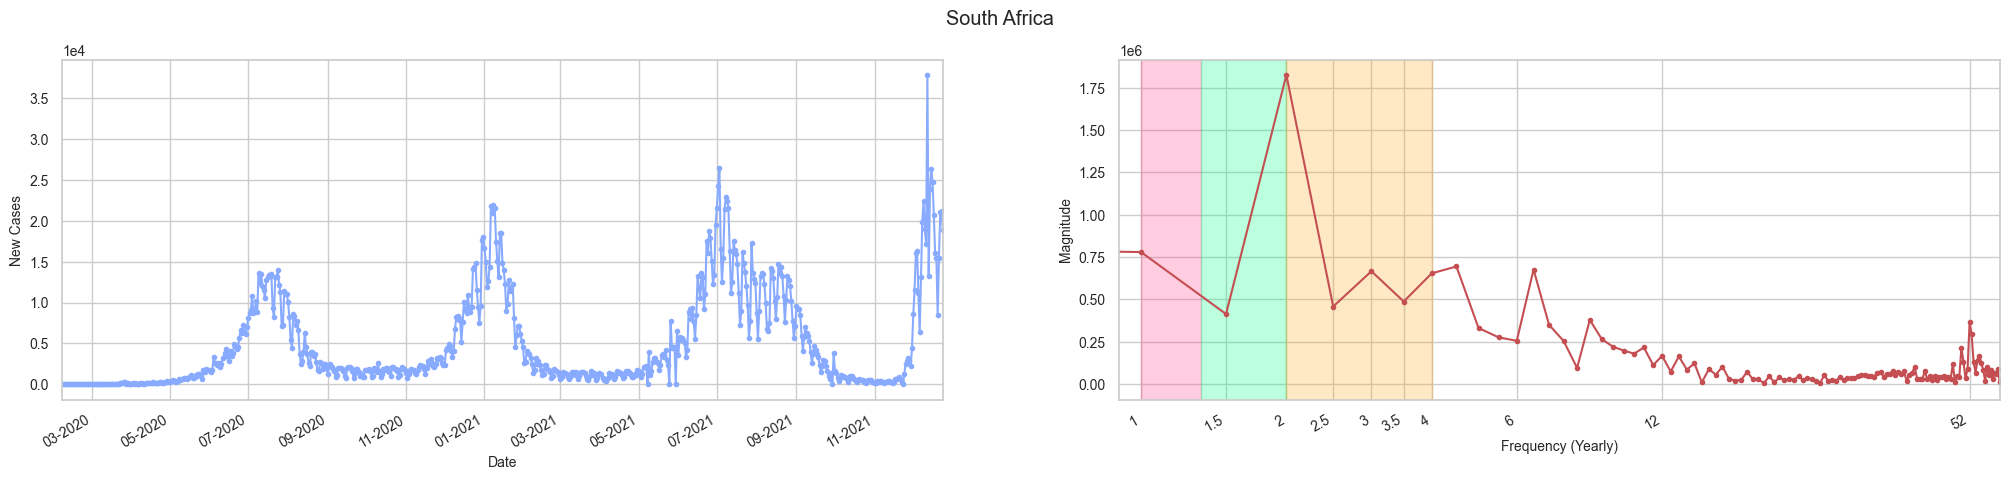

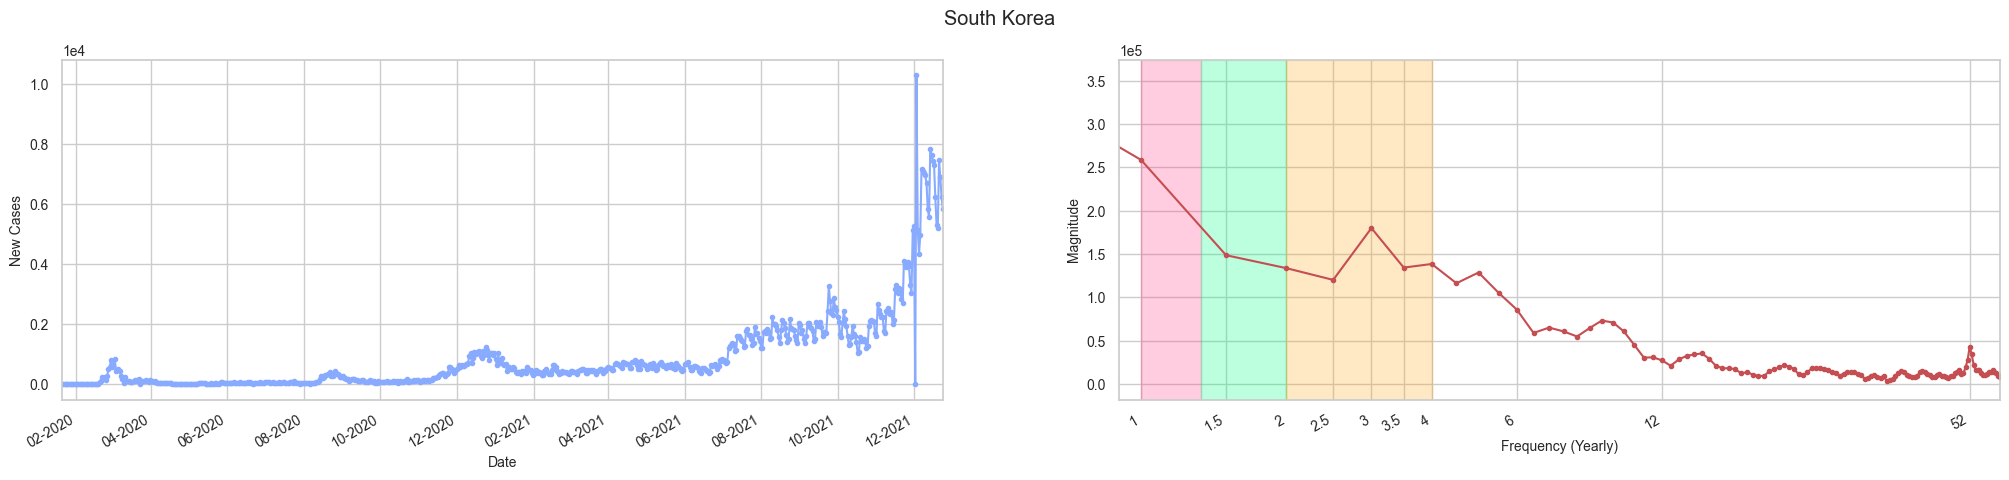

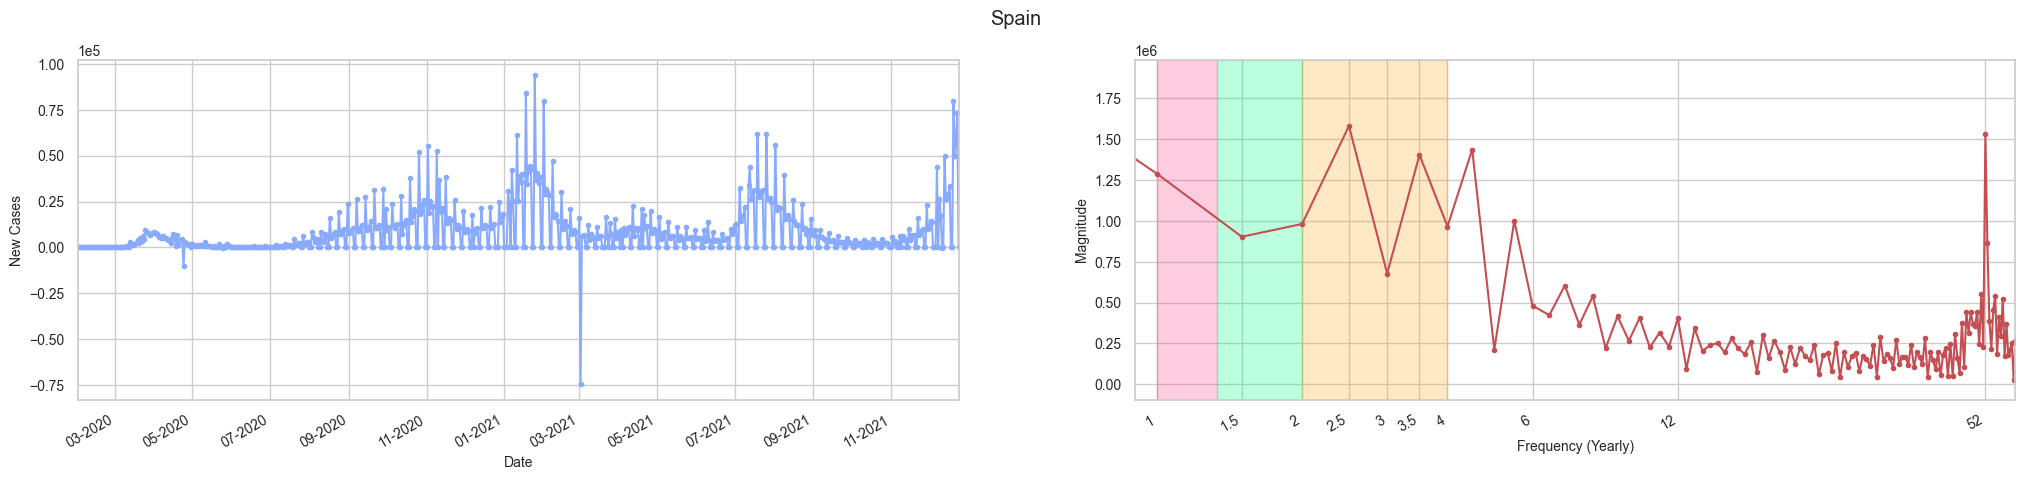

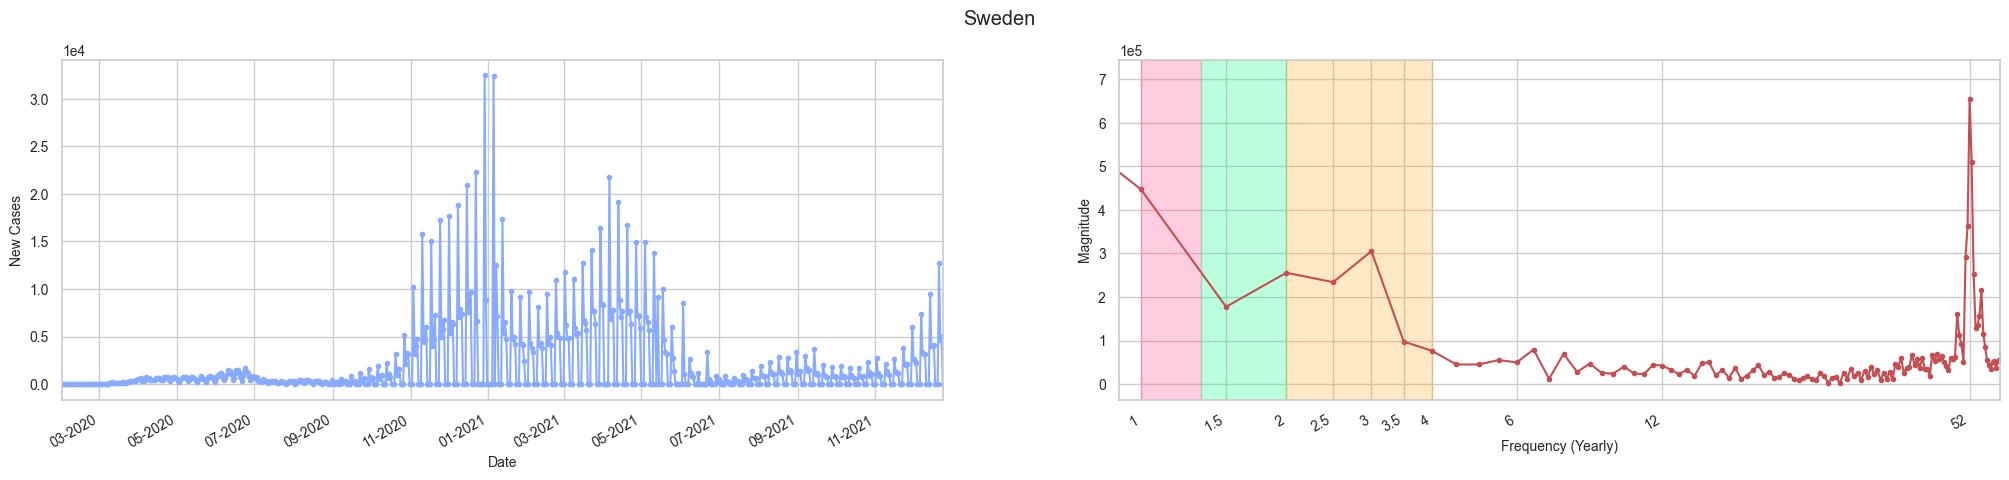

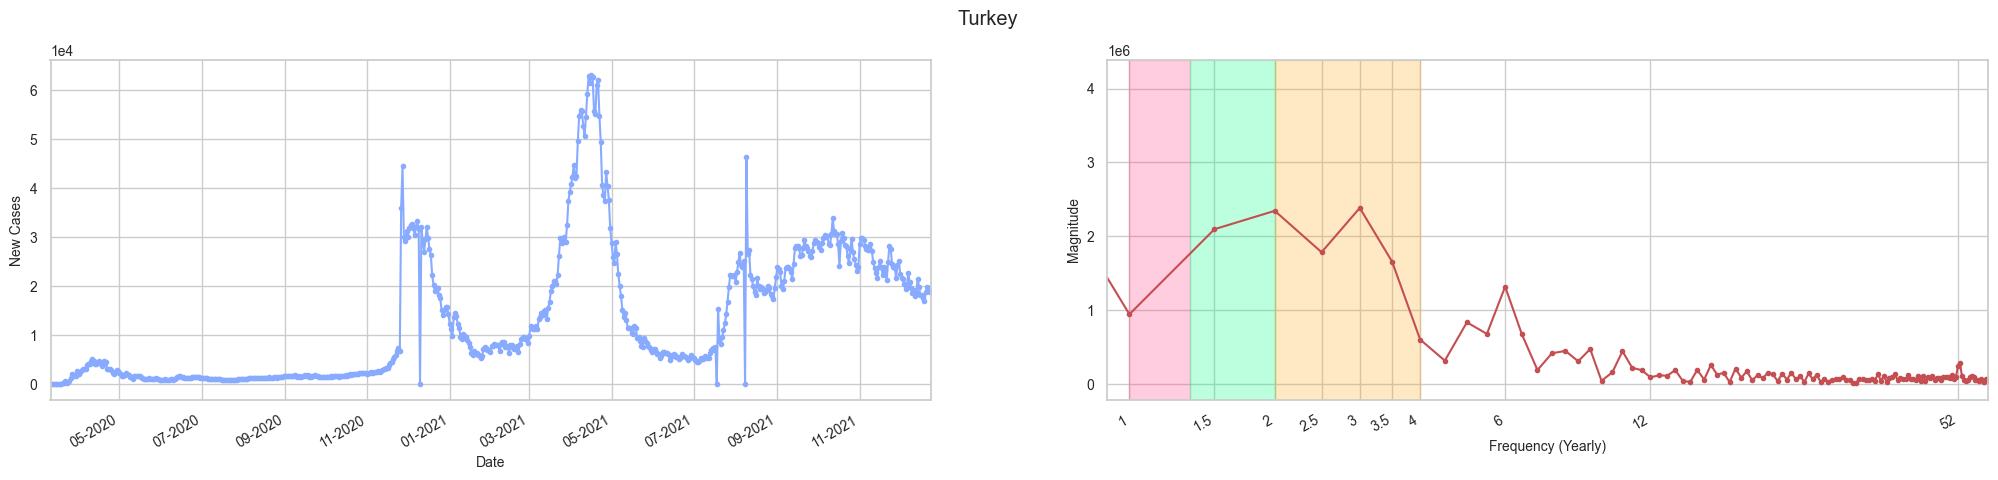

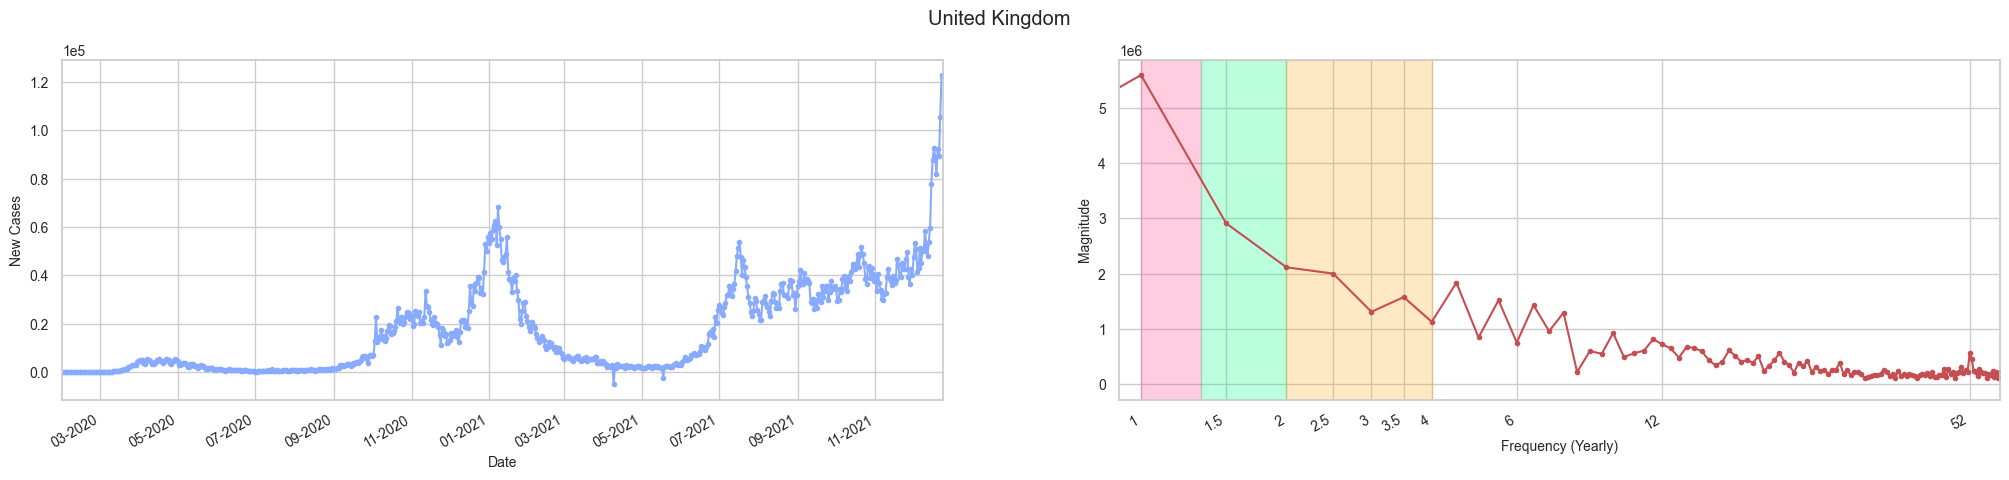

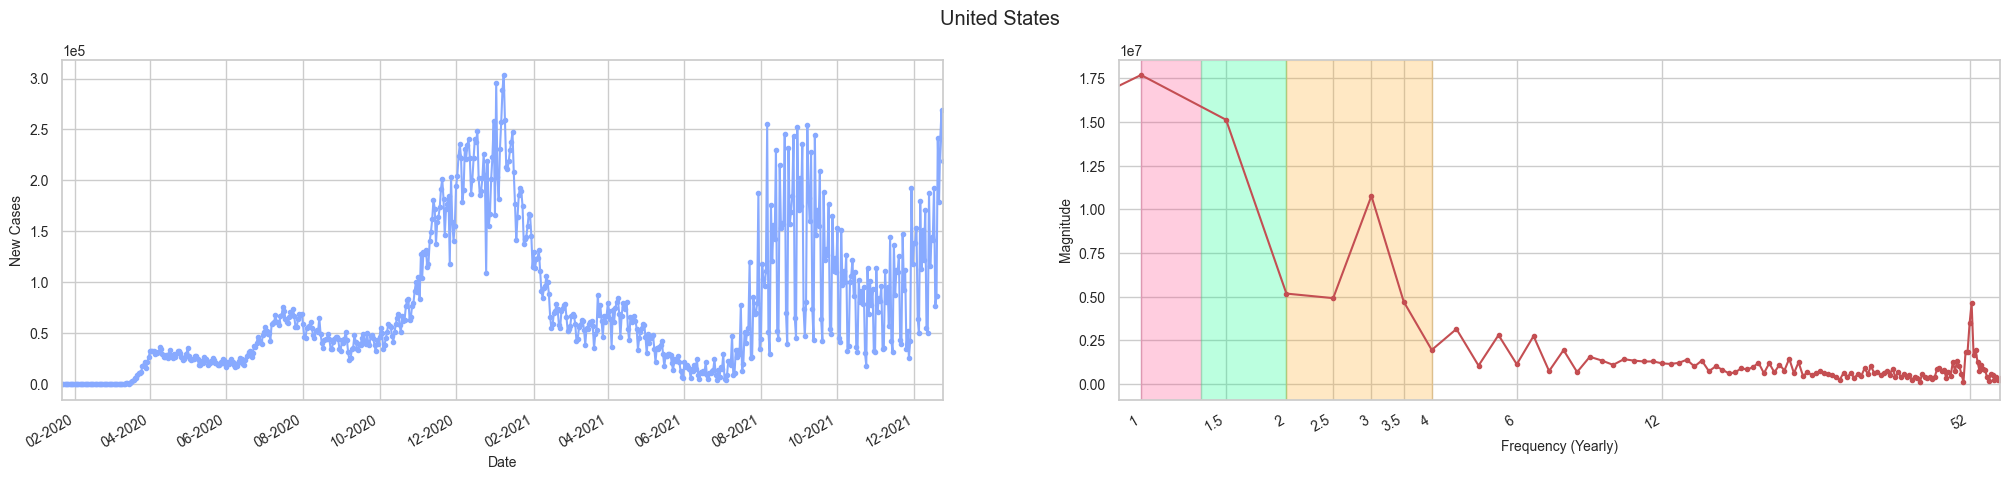

In [7]:
for nation in nations:
    y = data[(data.location == nation) & (data.date <= "2021-12-24")][['new_cases','date']]
    x = [datetime.strptime(d,'%Y-%m-%d').date() for d in y['date']]
    fig, (ax, ax2) = plt.subplots(1, 2,figsize=(25,5))
    
    # FIGURE A: NUMBER OF NEW DAILY CASES
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.plot(x,y.new_cases.values,".-",color="#8af")
    fig.autofmt_xdate()
    fig.suptitle(nation)
    ax.set_xlabel('Date')
    ax.set_ylabel('New Cases')
    ax.ticklabel_format(axis='y', scilimits=[-3, 3])
    ax.set_xlim((x[0],x[-1])); 
    
    # FIGURE B: DFT OF THE NEW CASES TIMESERIES
    # PADDED WITH 0s TO BE 730 DAYS LONG
    SAMPLE_RATE = 365 #365 DAYS IN A YEAR
    DURATION = 2 #YEARS
    N = SAMPLE_RATE * DURATION
    
    y = np.concatenate([np.zeros(N-len(y)),y.new_cases.values]) #730 days with zero padding
    y = y - np.mean(y) # mean centering
    yf = fft(y)
    xf = fftfreq(N, 1 / SAMPLE_RATE)
    
    ax2.plot(xf[:N//2],np.abs(yf[:N//2]),".-r",)

    ax2.axvspan(xmin=12/12,xmax=12/9,color="#f484")
    ax2.axvspan(xmin=12/9,xmax=12/6,color="#0f84")
    ax2.axvspan(xmin=12/6,xmax=12/3,color="#fa24")
    ax2.ticklabel_format(axis='y', scilimits=[-3, 3])
    ax2.set_xscale("log",base=2)
    ax2.set_xlim(0.9,60)
    ax2.set_xticks([1,1.5,2,2.5,3,3.5,4,6,12,52])
    ax2.set_xticklabels([1,1.5,2,2.5,3,3.5,4,6,12,52])
    ax2.set_xlabel("Frequency (Yearly)")
    ax2.set_ylabel("Magnitude")
    plt.show()